<a href="https://colab.research.google.com/github/PikoAll/Colab/blob/main/AIFish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ai per riconoscere diverse tipologie di pesce, 9 tipologie totali kaggle: https://www.kaggle.com/crowww/a-large-scale-fish-dataset

In [1]:
# tutti gli import
import os
import shutil
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D, BatchNormalization, MaxPooling2D   ############################# o 3D
from tensorflow.keras.regularizers import l2 
import tensorflow
from sklearn.metrics import confusion_matrix

In [2]:
#Costanti
DIM=(224,224)

In [3]:
os.mkdir("Dataset")  #creo la cartella

In [4]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#copio la caretella qua
shutil.copy("/content/drive/MyDrive/Dataset/Fish.zip","/content/Dataset/")

'/content/Dataset/Fish.zip'

Estrazione file zip

In [6]:
# apertura dell'archivio per estrazione
archivio = zipfile.ZipFile('/content/Dataset/Fish.zip')

# estrazione di tutti i file
archivio.extractall("/content/Dataset/")  #percorso dove estrerre i file

# chiusura
archivio.close()

In [7]:
#elimino alcuni file inutili
try: 
  os.remove("/content/Dataset/Fish_Dataset/Fish_Dataset/README.txt")
  #shutil.rmtree("/content/Dataset/Fish_Dataset/Fish_Dataset/Segmentation_example_script.m")
  os.remove("/content/Dataset/Fish_Dataset/Fish_Dataset/license.txt")
except EOFError:
  print("problemi a eliminare qualcosa")


os.chdir("/content/Dataset/Fish_Dataset/Fish_Dataset")
print(len(os.listdir()))
os.listdir()

10


['Striped Red Mullet',
 'Sea Bass',
 'Shrimp',
 'Red Sea Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Gilt-Head Bream',
 'Trout',
 'Segmentation_example_script.m',
 'Black Sea Sprat']

Carico le immaggini

In [8]:
X=[]
y=[]

for i in os.listdir("/content/Dataset/Fish_Dataset/Fish_Dataset/"):
  
  if i!="Segmentation_example_script.m":

    for j in os.listdir("/content/Dataset/Fish_Dataset/Fish_Dataset/"+i+"/"):

      if j==i:
        count=0
        for z in os.listdir("/content/Dataset/Fish_Dataset/Fish_Dataset/"+i+"/"+j+"/"):

          img=cv2.imread("/content/Dataset/Fish_Dataset/Fish_Dataset/"+i+"/"+j+"/"+z)
          img=cv2.resize(img,DIM,interpolation=cv2.INTER_LINEAR)/255     #ridimensinamento immaggine  il /255 normalizza i pixel  (100,100)
      
          X.append(img)
          y.append(i)
          count+=1
          
          if(count==600):
            break
          



X=np.array(X)
y=np.array(y) 

print("Tutto X ",X.shape," y ", y.shape)

Tutto X  (5400, 224, 224, 3)  y  (5400,)


In [9]:
np.unique(y)

array(['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel',
       'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp',
       'Striped Red Mullet', 'Trout'], dtype='<U18')

In [10]:
def show_exaple(x):
  fig=plt.figure()

  for i in range(x.shape[0]):
    plot=fig.add_subplot(1,x.shape[0], i+1)
    plt.imshow(X[i])
    plt.axis("off")

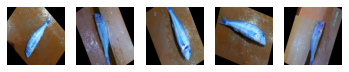

In [11]:
show_exaple(X[:5])  # gli ho passato solo le prime 5 immaggini di X

To categorical

In [12]:
NomiCartelle=os.listdir("/content/Dataset/Fish_Dataset/Fish_Dataset/")
NomiCartelle

Y=[]

for i in y:
  Y.append(NomiCartelle.index(i))

Y=to_categorical(Y)

In [13]:
Y[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, stratify=Y)

print("X train ", X_train.shape)
print("X test ", X_test.shape)
print("y train ", y_train.shape)
print("y test ", y_test.shape)

X train  (3780, 224, 224, 3)
X test  (1620, 224, 224, 3)
y train  (3780, 10)
y test  (1620, 10)


In [15]:
#K.clear_session()
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
'''

from tensorflow.keras import backend as K
K.clear_session()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))   #########################
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(254, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 254)               47402750  
_________________________________________________________________
dropout (Dropout)            (None, 254)               0

In [16]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(0.01), metrics=["accuracy","AUC"]) #SparseCategoricalCrossentropy()   ooookkkkkkk
#model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(0.01), metrics=["accuracy","AUC"]) #SparseCategoricalCrossentropy()
#model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.RMSprop(0.01), metrics=["accuracy","AUC"]) #SparseCategoricalCrossentropy()
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=30,validation_split=0.1)

pred=model.predict(X_test)
pred=np.argmax(pred,axis=1)


metrics_train=model.evaluate(X_train,y_train)
metrics_test=model.evaluate(X_test,y_test)
print("Train accuracy ",metrics_train[1])
print("Test accuracy ",metrics_test[1])

Epoch 1/30
107/107 [==============================] - 23s 59ms/step - loss: 8.2335 - accuracy: 0.1223 - auc: 0.5770 - val_loss: 8.0158 - val_accuracy: 0.2751 - val_auc: 0.7452
Epoch 2/30
107/107 [==============================] - 5s 49ms/step - loss: 7.8834 - accuracy: 0.1817 - auc: 0.6483 - val_loss: 7.6321 - val_accuracy: 0.3836 - val_auc: 0.7686
Epoch 3/30
107/107 [==============================] - 5s 50ms/step - loss: 7.5192 - accuracy: 0.2352 - auc: 0.7088 - val_loss: 7.1736 - val_accuracy: 0.3889 - val_auc: 0.8183
Epoch 4/30
107/107 [==============================] - 5s 50ms/step - loss: 7.1555 - accuracy: 0.3072 - auc: 0.7518 - val_loss: 6.9304 - val_accuracy: 0.3519 - val_auc: 0.7900
Epoch 5/30
107/107 [==============================] - 5s 49ms/step - loss: 6.8346 - accuracy: 0.3348 - auc: 0.7795 - val_loss: 6.5367 - val_accuracy: 0.5000 - val_auc: 0.8529
Epoch 6/30
107/107 [==============================] - 5s 50ms/step - loss: 6.5209 - accuracy: 0.3989 - auc: 0.8039 - val_los

In [17]:
pred=model.predict(X_test)
pred=np.argmax(pred,axis=1)
yy=np.argmax(y_test,axis=1)
cm= confusion_matrix(yy,pred)
cm

array([[135,   6,   8,   2,   5,   0,   2,   3,  19],
       [  0, 166,   0,   0,   0,   0,   2,   1,  11],
       [  3,   0, 174,   0,   0,   3,   0,   0,   0],
       [  0,   7,   0, 162,   2,   0,   6,   2,   1],
       [  0,  10,   0,   0, 150,   0,   2,   7,  11],
       [  2,   3,   3,   1,   1, 168,   1,   0,   1],
       [  0,  16,   0,   1,   1,   0, 154,   6,   2],
       [  0,   5,   0,   0,   1,   0,   0, 172,   2],
       [  0,   1,   0,   0,   0,   0,   0,   0, 179]])